In [1]:
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
import PIL.Image as Image
import time

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

In [4]:
#from pytorch official docs

category_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus','train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign','parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow','elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A','handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball','kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket','bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl','banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza','donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table','N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone','microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book','clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

#n/a in list is removed from frcnn papers

In [5]:
def get_pred(img_path,threshold):
    img = Image.open(img_path)
    transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    img = transform(img)
    pred = model([img]) #ger prediction from model
    pred_class = [category_names[i] for i in list(pred[0]['labels'].numpy())] #get the classes predicted
    pred_box = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] #get boxes for each prediction
    pred_score = list(pred[0]['scores'].detach().numpy()) #get scores/accuracy of each prediction
    pred_index = [pred_score.index(x) for x in pred_score if x > threshold][-1] #index with threshold is selected
    pred_box = pred_box[:pred_index+1]
    pred_class = pred_class[:pred_index+1]
    return pred_box,pred_class

In [6]:
def frcnn(img_path,threshold=0.6,text_size=3,text_thickness=3,rectangle_thickness=3):
    boxes,pred_class = get_pred(img_path,threshold)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert image to RGB
    for i in range(len(boxes)):
        p = cv2.rectangle(img,boxes[i][0],boxes[i][1],color=(0,0,255),thickness=rectangle_thickness)  #draw rectangle (variable used to supress empty images)
        q = cv2.putText(img,pred_class[i],boxes[i][0],cv2.FONT_HERSHEY_SIMPLEX,text_size,(0,0,255),thickness=text_thickness) #write the class text (variable used to supress empty images)
    plt.figure(figsize=(20,30))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    t= time.time()
    plt.savefig('./{}.png'.format(int(t))) #save the finished image with boxes and classes

<ipython-input-6-79b242291c53>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  p = cv2.rectangle(img,boxes[i][0],boxes[i][1],color=(0,0,255),thickness=rectangle_thickness)  #draw rectangle (variable used to supress empty images)
<ipython-input-6-79b242291c53>:7: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  q = cv2.putText(img,pred_class[i],boxes[i][0],cv2.FONT_HERSHEY_SIMPLEX,text_size,(0,0,255),thickness=text_thickness) #write the class text (variable used to supress empty images)


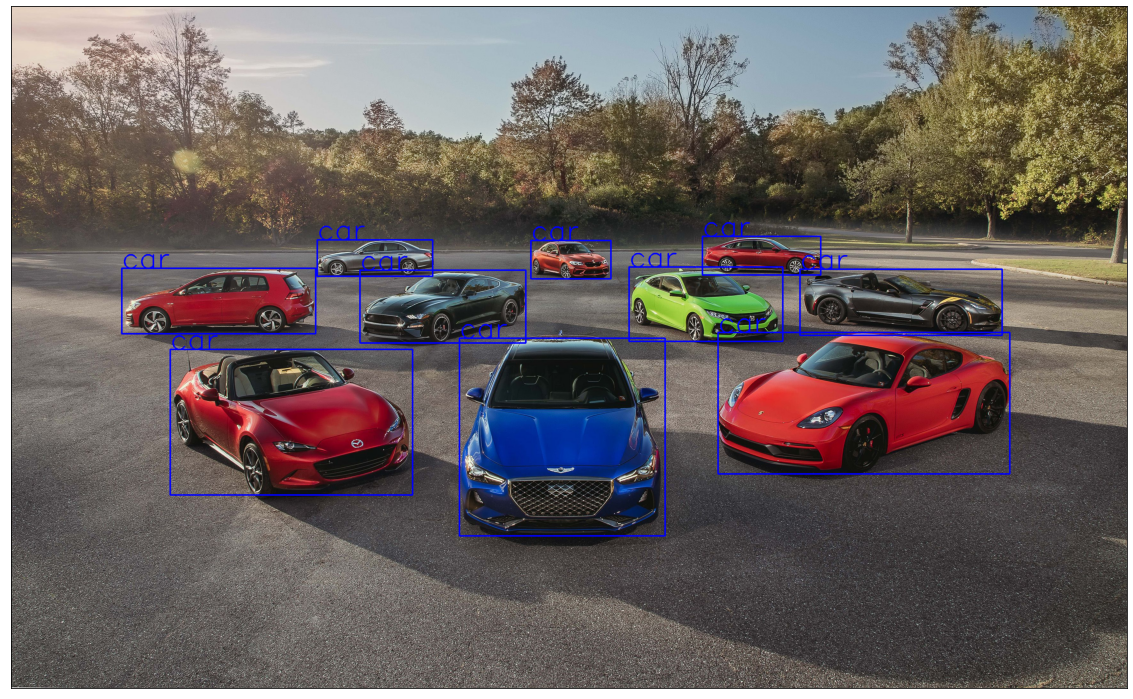

In [7]:
frcnn("./test2.jpg",threshold=0.8)

<ipython-input-6-79b242291c53>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  p = cv2.rectangle(img,boxes[i][0],boxes[i][1],color=(0,0,255),thickness=rectangle_thickness)  #draw rectangle (variable used to supress empty images)
<ipython-input-6-79b242291c53>:7: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  q = cv2.putText(img,pred_class[i],boxes[i][0],cv2.FONT_HERSHEY_SIMPLEX,text_size,(0,0,255),thickness=text_thickness) #write the class text (variable used to supress empty images)


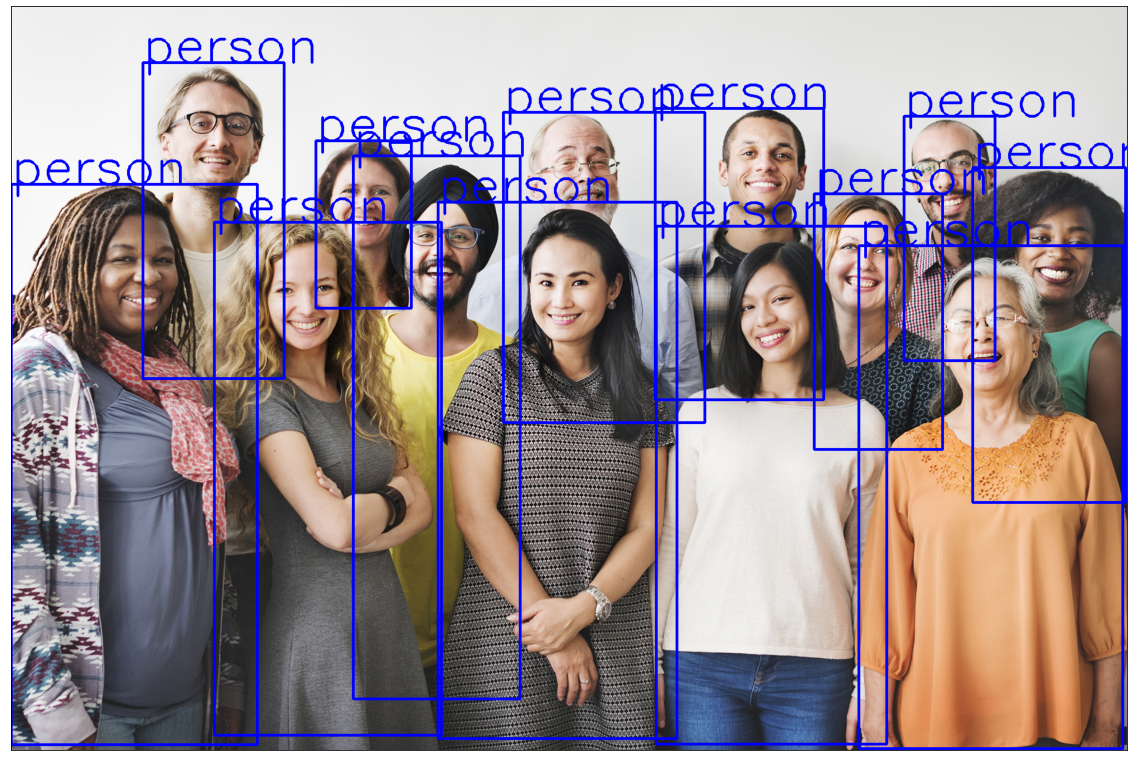

In [8]:
frcnn("./test.jpg",threshold=0.8)